In [ ]:
import numpy as np
import pandas as pd


dfs = []
for i in range(1,5):
    path = 'UNSW-NB15_{}.csv'  # There are 4 input csv files
    dfs.append(pd.read_csv(path.format(i), header = None,low_memory=False))
data = pd.concat(dfs).reset_index(drop=True)

# This csv file contains names of all the features
df_col = pd.read_csv('NUSW-NB15_features.csv', encoding='ISO-8859-1')
# Making column names lower case, removing spaces
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())
# Renaming our dataframe with proper column names
data.columns = df_col['Name']
dataSet = data
dataSet.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390.0,149.171.126.6,53,udp,CON,0.001055,132.0,164.0,31.0,...,0.0,3.0,7.0,1.0,3.0,1.0,1.0,1.0,NaN,0.0
1,59.166.0.0,33661.0,149.171.126.9,1024,udp,CON,0.036133,528.0,304.0,31.0,...,0.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,NaN,0.0
2,59.166.0.6,1464.0,149.171.126.7,53,udp,CON,0.001119,146.0,178.0,31.0,...,0.0,12.0,8.0,1.0,2.0,2.0,1.0,1.0,NaN,0.0
3,59.166.0.5,3593.0,149.171.126.5,53,udp,CON,0.001209,132.0,164.0,31.0,...,0.0,6.0,9.0,1.0,1.0,1.0,1.0,1.0,NaN,0.0
4,59.166.0.3,49664.0,149.171.126.0,53,udp,CON,0.001169,146.0,178.0,31.0,...,0.0,7.0,9.0,1.0,1.0,1.0,1.0,1.0,NaN,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit          

In [ ]:
# Iterate through each column and print unique values
for col in dataSet.columns:
    unique_values = dataSet[col].unique()
    num_distinct_values = dataSet[col].nunique()
    print(f'{col} have {num_distinct_values} value : {unique_values}')

srcip have 43 value : ['59.166.0.0' '59.166.0.6' '59.166.0.5' '59.166.0.3' '10.40.182.3'
 '59.166.0.7' '10.40.170.2' '59.166.0.1' '59.166.0.2' '59.166.0.4'
 '175.45.176.3' '175.45.176.2' '175.45.176.0' '59.166.0.8' '59.166.0.9'
 '175.45.176.1' '10.40.182.1' '10.40.85.1' '192.168.241.243' '10.40.85.30'
 '149.171.126.16' '149.171.126.2' '149.171.126.11' '149.171.126.4'
 '149.171.126.5' '149.171.126.17' '149.171.126.19' '149.171.126.9'
 '149.171.126.8' '149.171.126.7' '149.171.126.15' '149.171.126.6'
 '149.171.126.0' '149.171.126.1' '149.171.126.3' '149.171.126.13'
 '149.171.126.12' '149.171.126.10' '149.171.126.18' '127.0.0.1'
 '149.171.126.14' '10.40.85.10' '10.40.182.6']
sport have 129124 value : ['1390' '33661' '1464' ... 533 933 706]
dstip have 47 value : ['149.171.126.6' '149.171.126.9' '149.171.126.7' '149.171.126.5'
 '149.171.126.0' '149.171.126.4' '10.40.182.3' '10.40.170.2'
 '149.171.126.18' '149.171.126.16' '149.171.126.8' '149.171.126.2'
 '149.171.126.1' '149.171.126.10' '149.

In [ ]:
# Select only categorical columns
categorical_columns = dataSet.select_dtypes(include=['object']).columns
# Initialize an empty dictionary to store results
result_dict = {}

# Iterate through each categorical column
for column in categorical_columns:
    # Calculate value counts
    value_counts = dataSet[column].value_counts()

    # Calculate percentages
    percentages = (value_counts / len(dataSet[column])) * 100

    # Combine counts and percentages into a DataFrame
    result_df = pd.DataFrame({
        'Count': value_counts,
        'Percentage': percentages
    })

    # Store the result in the dictionary
    result_dict[column] = result_df

# Print the results
for column, result_df in result_dict.items():
    print(f"Column: {column}")
    print(result_df)
    print()

Column: srcip
                  Count  Percentage
59.166.0.4       197959    7.793517
59.166.0.1       197680    7.782533
59.166.0.5       197626    7.780407
59.166.0.2       197550    7.777415
59.166.0.0       197528    7.776549
59.166.0.3       195953    7.714542
59.166.0.9       190187    7.487539
59.166.0.6       189419    7.457303
59.166.0.8       189341    7.454232
59.166.0.7       189059    7.443130
175.45.176.1     127998    5.039198
175.45.176.3     118673    4.672079
175.45.176.0      82999    3.267617
149.171.126.18    81680    3.215689
149.171.126.15    44883    1.767015
149.171.126.14    41047    1.615994
175.45.176.2      32026    1.260843
149.171.126.10    30365    1.195450
149.171.126.12    16082    0.633138
10.40.85.1         4018    0.158186
10.40.182.1        3984    0.156847
10.40.182.6        3492    0.137478
10.40.85.30        2138    0.084172
10.40.182.3        2105    0.082872
10.40.170.2        2094    0.082439
10.40.85.10         793    0.031220
149.171.126.5 

In [ ]:
dataSet['attack_cat'].unique()

array([nan, 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Reconnaissance ',
       'Backdoor', ' Fuzzers ', ' Shellcode '], dtype=object)

In [ ]:
dataSet['attack_cat'] = dataSet.attack_cat.fillna(value='normal').apply(lambda x: x.strip().lower())
dataSet['attack_cat'] = dataSet['attack_cat'].replace('backdoors','backdoor', regex=True).apply(lambda x: x.strip().lower())
dataSet['attack_cat'].unique()


array(['normal', 'exploits', 'reconnaissance', 'dos', 'generic',
       'shellcode', 'fuzzers', 'worms', 'backdoor', 'analysis'],
      dtype=object)

In [ ]:
# Replace '-' with 'unknown'
dataSet['service'] = dataSet['service'].replace('-', 'unknown')

In [ ]:

# Remove leading and trailing whitespaces
dataSet['ct_ftp_cmd'] = dataSet['ct_ftp_cmd'].astype(str).str.strip()

# Replace empty strings with NaN
dataSet['ct_ftp_cmd'].replace('', np.nan, inplace=True)

# Convert the column to numeric type
dataSet['ct_ftp_cmd'] = pd.to_numeric(dataSet['ct_ftp_cmd'], errors='coerce')


In [ ]:
dataSet['ct_ftp_cmd'].unique()

array([ 0.,  1.,  6.,  2., nan,  4.])

In [ ]:
numerical_col = dataSet.select_dtypes(include=np.number).columns  # All the numerical columns list
categorical_col = dataSet.select_dtypes(exclude=np.number).columns  # All the categorical columns list

# Calculate the median and replace null values

for col in dataSet.columns:
    if dataSet[col].dtypes == 'object' :
        val = dataSet[col].mode().values[0]  # Mode value of the column in train data
        dataSet[col] = dataSet[col].fillna(value=val).replace(' ', val)
    else:
        val = dataSet[col].median()
        dataSet[col] = dataSet[col].fillna(value=val).replace(' ', val)
    print(col,val)

srcip 175.45.176.3
sport 32035.0
dstip 149.171.126.4
dsport 53
proto tcp
state FIN
dur 0.018328
sbytes 1540.0
dbytes 1728.0
sttl 31.0
dttl 29.0
sloss 3.0
dloss 4.0
service unknown
sload 563706.5625
dload 590381.4375
spkts 12.0
dpkts 12.0
swin 255.0
dwin 255.0
stcpb 752154333.0
dtcpb 740942526.0
smeansz 73.0
dmeansz 89.0
trans_depth 0.0
res_bdy_len 0.0
sjit 22.234671
djit 2.7852
stime 1424231272.0
ltime 1424231273.0
sintpkt 0.528
dintpkt 0.478804
tcprtt 0.000623
synack 0.00049
ackdat 0.000124
is_sm_ips_ports 0.0
ct_state_ttl 0.0
ct_flw_http_mthd 0.0
is_ftp_login 0.0
ct_ftp_cmd 0.0
ct_srv_src 5.0
ct_srv_dst 5.0
ct_dst_ltm 3.0
ct_src_ltm 4.0
ct_src_dport_ltm 1.0
ct_dst_sport_ltm 1.0
ct_dst_src_ltm 2.0
attack_cat normal
label 0.0


In [ ]:
# Iterate through each column and print unique values
for col in dataSet.columns:
    unique_values = dataSet[col].unique()
    num_distinct_values = dataSet[col].nunique()
    print(f'{col} have {num_distinct_values} value : {unique_values}')

srcip have 43 value : ['59.166.0.0' '59.166.0.6' '59.166.0.5' '59.166.0.3' '10.40.182.3'
 '59.166.0.7' '10.40.170.2' '59.166.0.1' '59.166.0.2' '59.166.0.4'
 '175.45.176.3' '175.45.176.2' '175.45.176.0' '59.166.0.8' '59.166.0.9'
 '175.45.176.1' '10.40.182.1' '10.40.85.1' '192.168.241.243' '10.40.85.30'
 '149.171.126.16' '149.171.126.2' '149.171.126.11' '149.171.126.4'
 '149.171.126.5' '149.171.126.17' '149.171.126.19' '149.171.126.9'
 '149.171.126.8' '149.171.126.7' '149.171.126.15' '149.171.126.6'
 '149.171.126.0' '149.171.126.1' '149.171.126.3' '149.171.126.13'
 '149.171.126.12' '149.171.126.10' '149.171.126.18' '127.0.0.1'
 '149.171.126.14' '10.40.85.10' '10.40.182.6']
sport have 129124 value : ['1390' '33661' '1464' ... 533 933 706]
dstip have 47 value : ['149.171.126.6' '149.171.126.9' '149.171.126.7' '149.171.126.5'
 '149.171.126.0' '149.171.126.4' '10.40.182.3' '10.40.170.2'
 '149.171.126.18' '149.171.126.16' '149.171.126.8' '149.171.126.2'
 '149.171.126.1' '149.171.126.10' '149.

In [ ]:
# Fixing binary columns
dataSet['is_ftp_login'] = np.where(dataSet['is_ftp_login']>1, 1, dataSet['is_ftp_login'])
for col in dataSet.columns:
    print(col)
    print(dataSet[col].unique())

srcip
['59.166.0.0' '59.166.0.6' '59.166.0.5' '59.166.0.3' '10.40.182.3'
 '59.166.0.7' '10.40.170.2' '59.166.0.1' '59.166.0.2' '59.166.0.4'
 '175.45.176.3' '175.45.176.2' '175.45.176.0' '59.166.0.8' '59.166.0.9'
 '175.45.176.1' '10.40.182.1' '10.40.85.1' '192.168.241.243' '10.40.85.30'
 '149.171.126.16' '149.171.126.2' '149.171.126.11' '149.171.126.4'
 '149.171.126.5' '149.171.126.8' '149.171.126.3' '149.171.126.6'
 '149.171.126.9' '149.171.126.7' '149.171.126.0' '149.171.126.1'
 '149.171.126.18' '10.40.85.10' '149.171.126.12' '10.40.182.6' '59.1']
sport
[ 1390. 33661.  1464. ... 31641. 15431. 55579.]
dstip
['149.171.126.6' '149.171.126.9' '149.171.126.7' '149.171.126.5'
 '149.171.126.0' '149.171.126.4' '10.40.182.3' '10.40.170.2'
 '149.171.126.18' '149.171.126.16' '149.171.126.8' '149.171.126.2'
 '149.171.126.1' '149.171.126.10' '149.171.126.3' '149.171.126.15'
 '149.171.126.14' '149.171.126.12' '149.171.126.13' '149.171.126.11'
 '224.0.0.5' '149.171.126.17' '149.171.126.19' '192.168.

In [ ]:
dataSet.drop(['label','stime','ltime'], axis=1, inplace=True)

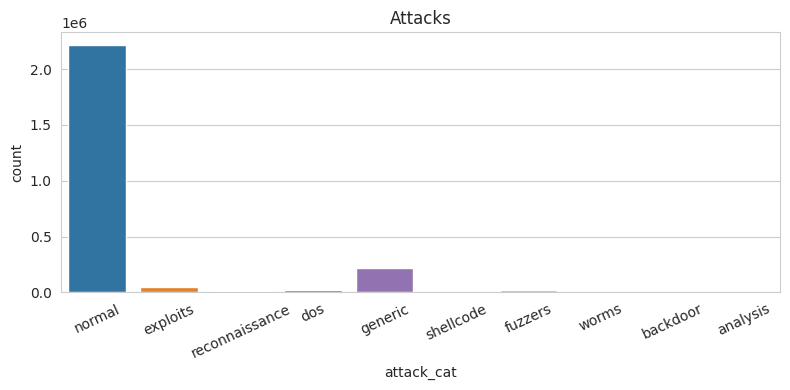

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('whitegrid')
    # countplot of the given column
ax = sns.countplot(x='attack_cat',  data=dataSet)
ax.set_title("Attacks")
plt.xticks(rotation=25)
# Adjust layout and display the plot
plt.tight_layout()
# Save the figure as an PNG file
plt.savefig('UNSWNB15_Attacks.png', dpi=300, format='png')
plt.show()

In [ ]:
dataSet['attack_cat'].replace({ 'dos' : 1, 'normal':0, 'reconnaissance':1, 'backdoor':1, 'exploits':1,
       'analysis':1, 'fuzzers':1, 'worms':1, 'shellcode':1, 'generic':1},inplace = True)
for col_name in dataSet.columns:
    if dataSet[col_name].dtypes == 'object' :
        unique_cat = len(dataSet[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'srcip' has 37 categories
Feature 'dstip' has 43 categories
Feature 'dsport' has 29639 categories
Feature 'proto' has 9 categories
Feature 'state' has 13 categories
Feature 'service' has 13 categories


In [ ]:
# Select columns with data type 'object'
object_columns = dataSet.select_dtypes(include=['object'])

# Print or use the selected columns as needed
print(object_columns)

Name            srcip  sport           dstip dsport proto state   service
0          59.166.0.0   1390   149.171.126.6     53   udp   CON       dns
1          59.166.0.0  33661   149.171.126.9   1024   udp   CON   unknown
2          59.166.0.6   1464   149.171.126.7     53   udp   CON       dns
3          59.166.0.5   3593   149.171.126.5     53   udp   CON       dns
4          59.166.0.3  49664   149.171.126.0     53   udp   CON       dns
...               ...    ...             ...    ...   ...   ...       ...
2540042    59.166.0.5  33094   149.171.126.7  43433   tcp   FIN  ftp-data
2540043    59.166.0.7  20848   149.171.126.4     21   tcp   CON       ftp
2540044    59.166.0.3  21511   149.171.126.9     21   tcp   CON       ftp
2540045    59.166.0.9  35433   149.171.126.0     80   tcp   CON      http
2540046  175.45.176.0  17293  149.171.126.17    110   tcp   CON      pop3

[2540047 rows x 7 columns]


In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features = ['srcip','sport','dstip','dsport','proto','service','state']
for f in features:
    dataSet[f] = dataSet[f].astype(str)
for f in features:
    dataSet[f] = le.fit_transform(dataSet[f])


# One-hot encode categorical variables
#dataSet = pd.get_dummies(dataSet, columns=['state'])
dataSet.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
0,27,3597,21,19439,7,2,0.001055,132.0,164.0,31.0,...,0.0,0.0,3.0,7.0,1.0,3.0,1.0,1.0,1.0,0
1,27,21732,24,103,7,2,0.036133,528.0,304.0,31.0,...,0.0,0.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,0
2,33,4292,22,19439,7,2,0.001119,146.0,178.0,31.0,...,0.0,0.0,12.0,8.0,1.0,2.0,2.0,1.0,1.0,0
3,32,23764,20,19439,7,2,0.001209,132.0,164.0,31.0,...,0.0,0.0,6.0,9.0,1.0,1.0,1.0,1.0,1.0,0
4,30,36218,5,19439,7,2,0.001169,146.0,178.0,31.0,...,0.0,0.0,7.0,9.0,1.0,1.0,1.0,1.0,1.0,0


In [ ]:
dataSet.head(100)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
0,33,4276,24,47344,120,2,0.001055,132,164,31,...,0.0,0.0,3,7,1,3,1,1,1,0
1,33,26036,27,253,120,2,0.036133,528,304,31,...,0.0,0.0,2,4,2,3,1,1,2,0
2,39,5091,25,47344,120,2,0.001119,146,178,31,...,0.0,0.0,12,8,1,2,2,1,1,0
3,38,28534,23,47344,120,2,0.001209,132,164,31,...,0.0,0.0,6,9,1,1,1,1,1,0
4,36,43654,8,47344,120,2,0.001169,146,178,31,...,0.0,0.0,7,9,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,30,37252,13,62606,114,5,0.244832,876,9446,62,...,0.0,0.0,3,1,1,1,1,1,1,1
96,39,38992,9,47344,120,2,0.001069,130,162,31,...,0.0,0.0,12,8,2,2,2,1,1,0
97,35,32053,9,42243,120,2,0.001793,520,304,31,...,0.0,0.0,5,3,2,1,1,1,1,0
98,39,36514,23,47344,120,2,0.001112,146,178,31,...,0.0,0.0,12,9,1,2,2,1,1,0


In [ ]:
x = dataSet.iloc[:,0:45]
y = dataSet.iloc[:,45]

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, train_size = 0.7,
                                                    random_state = 88, shuffle= True,
                                                    stratify=y)

In [ ]:
x_train.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
1767710,35,36930,8,47344,120,2,0.001143,146,178,31,...,0.0,0.0,0.0,3,2,2,6,1,1,2
557815,40,55154,23,62606,114,5,1.016045,1684,10168,31,...,1.0,0.0,0.0,3,1,2,3,1,1,1
2207884,14,453,29,47344,120,6,0.000008,264,0,60,...,0.0,0.0,0.0,25,25,23,23,23,23,25
1627819,39,33174,27,47344,120,2,0.001016,130,162,31,...,0.0,0.0,0.0,3,1,1,2,1,1,2
546491,37,8130,25,27237,114,5,0.045197,3822,56628,31,...,0.0,0.0,0.0,3,5,2,4,1,1,1


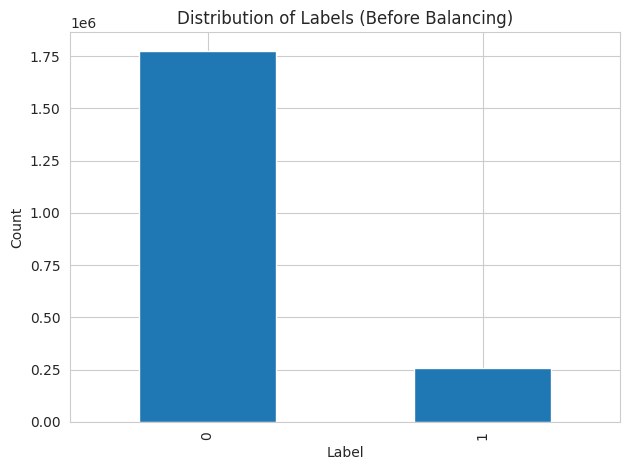

In [ ]:
#before balancing the label
import matplotlib.pyplot as plt

# plot the distribution of the 'label' column before balancing
y_train.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (Before Balancing)')
# Adjust layout and display the plot
plt.tight_layout()
# Save the figure as an PNG file
plt.savefig('UNBALANCED.png', dpi=300, format='png')
plt.show()

In [ ]:
y_train.value_counts()

0    1775011
1     257026
Name: attack_cat, dtype: int64

NameError: ignored

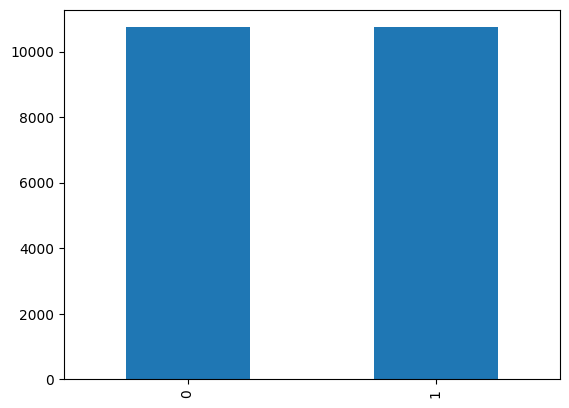

In [ ]:
#from imblearn.under_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=88)
x_train, y_train = under_sampler.fit_resample(x_train, y_train)

# plot the distribution of the 'label' column after balancing
y_train.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (after Balancing)')
# Adjust layout and display the plot
plt.tight_layout()
# Save the figure as an PNG file
plt.savefig('BALANCED.png', dpi=300, format='png')
plt.show()

In [ ]:
y_train.value_counts()

0    10737
1    10737
Name: attack_cat, dtype: int64

## UNSUPERVISED

In [ ]:
train_normal = y_train==0
print(train_normal)

0         True
1         True
2         True
3         True
4         True
         ...  
21469    False
21470    False
21471    False
21472    False
21473    False
Name: attack_cat, Length: 21474, dtype: bool


In [ ]:
x_normal = x_train[train_normal]
x_normal.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,32,33730,20,19439,7,2,0.001013,146.0,178.0,31.0,...,0.0,0.0,0.0,10.0,5.0,1.0,3.0,2.0,1.0,1.0
1,29,40007,18,9586,6,4,0.178323,4160.0,2664.0,31.0,...,0.0,0.0,0.0,6.0,7.0,4.0,6.0,1.0,1.0,3.0
2,34,26508,19,25661,6,4,1.200885,1580.0,10168.0,31.0,...,1.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0
3,31,34883,20,25661,6,4,1.084026,1684.0,10168.0,31.0,...,1.0,0.0,0.0,2.0,2.0,6.0,5.0,2.0,1.0,3.0
4,28,45519,6,19439,7,2,0.001043,146.0,178.0,31.0,...,0.0,0.0,0.0,3.0,4.0,4.0,10.0,2.0,1.0,2.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Assuming x_train, y_train, x_test, and y_test are defined.
# Assuming train_normal, x_normal, y_train, y_test, y_if_train, and y_if_hold are also defined.

# Train the Isolation Forest model
IF = IsolationForest(random_state=88)
IF.fit(x_normal)

# Predict on training and test sets
y_if_train = IF.predict(x_train)
y_if_hold = IF.predict(x_test)

# Decision function values
decision_function_train = IF.decision_function(x_train)
decision_function_test = IF.decision_function(x_test)


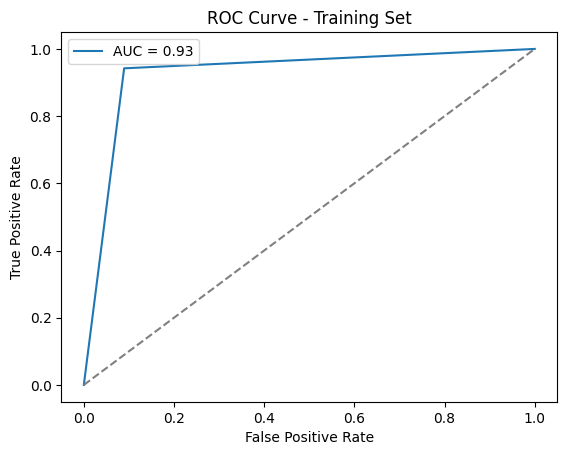

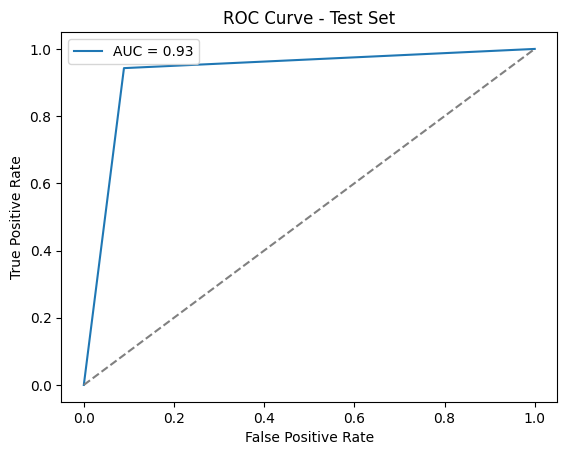

In [ ]:
# Plot ROC Curve and AUC Score
def plot_roc_curve(y_true, y_scores, title='ROC Curve', save_path=None):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc_score = roc_auc_score(y_true, y_scores)

    plt.figure()  # Create a new figure for ROC curve
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()

# Save ROC curve for training set
plot_roc_curve(y_train, np.where(y_if_train == -1, 1, 0), title='ROC Curve - Training Set', save_path='roc_curve_train.png')

# Save ROC curve for test set
plot_roc_curve(y_test, np.where(y_if_hold == -1, 1, 0), title='ROC Curve - Test Set', save_path='roc_curve_test.png')

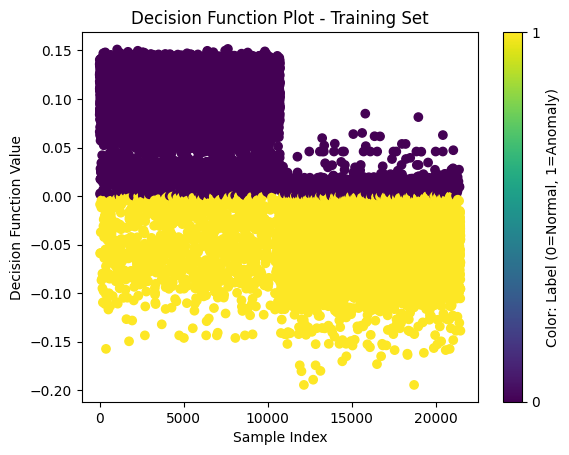

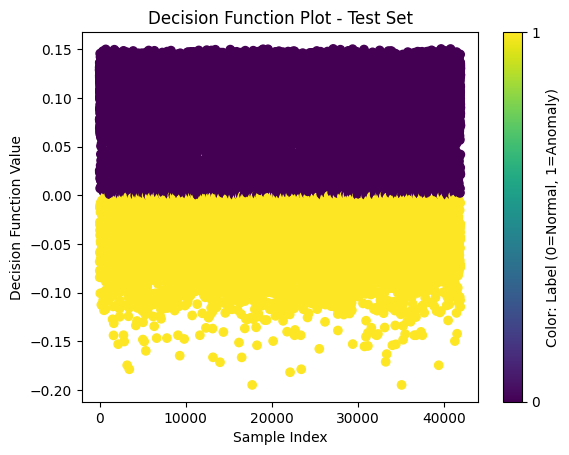

In [ ]:
# Plot Decision Function Plot
def plot_decision_function(model, X, title='Decision Function Plot', save_path=None):
    decision_function = model.decision_function(X)
    colors = np.where(decision_function < 0, 1, 0)  # Use binary colors for anomalies (1) and normal samples (0)

    plt.figure()  # Create a new figure
    plt.scatter(range(len(X)), decision_function, c=colors, cmap='viridis')
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Decision Function Value')
    plt.colorbar(ticks=[0, 1], label='Color: Label (0=Normal, 1=Anomaly)')

    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()

# Save decision function plot for training set
plot_decision_function(IF, x_train, title='Decision Function Plot - Training Set', save_path='decision_function_train.png')

# Save decision function plot for test set
plot_decision_function(IF, x_test, title='Decision Function Plot - Test Set', save_path='decision_function_test.png')


In [ ]:
# Print Classification Report
def print_classification_report(y_true, y_pred):
    print(classification_report(y_true, y_pred, zero_division=1))  # Set zero_division to 1

# Save classification report for training set
print_classification_report(y_train, np.where(y_if_train == -1, 1, 0))

# Save classification report for test set
print_classification_report(y_test, np.where(y_if_hold == -1, 1, 0))


              precision    recall  f1-score   support

           0       0.94      0.91      0.93     10737
           1       0.91      0.94      0.93     10737

    accuracy                           0.93     21474
   macro avg       0.93      0.93      0.93     21474
weighted avg       0.93      0.93      0.93     21474

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     37288
           1       0.57      0.94      0.71      4602

    accuracy                           0.91     41890
   macro avg       0.78      0.93      0.83     41890
weighted avg       0.95      0.91      0.92     41890



In [ ]:
from sklearn.ensemble import IsolationForest
# Train the Isolation Forest model
IF = IsolationForest(random_state=88)
IF.fit(x_normal)

IsolationForest(random_state=88)

In [ ]:
y_if_train = IF.predict(x_train)
y_if_hold = IF.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score,auc,precision_recall_curve, average_precision_score

conf_matrix_train = confusion_matrix(y_train, np.where(y_if_train == -1, 1, 0))
print("Confusion Matrix:")
print(conf_matrix_train)

Confusion Matrix:
[[ 9777   960]
 [  620 10117]]


In [ ]:
y_if_train=np.where(y_if_train == -1, 1, 0)
roc =roc_auc_score(y_train, y_if_train)
print(roc)


0.9264226506472946


In [ ]:
conf_matrix_test = confusion_matrix(y_test, np.where(y_if_hold == -1, 1, 0))
print("Confusion Matrix:")
print(conf_matrix_test)

Confusion Matrix:
[[33969  3319]
 [  263  4339]]


In [ ]:
print(roc_auc_score(y_test, np.where(y_if_hold == -1, 1, 0)))

0.9269205326247805


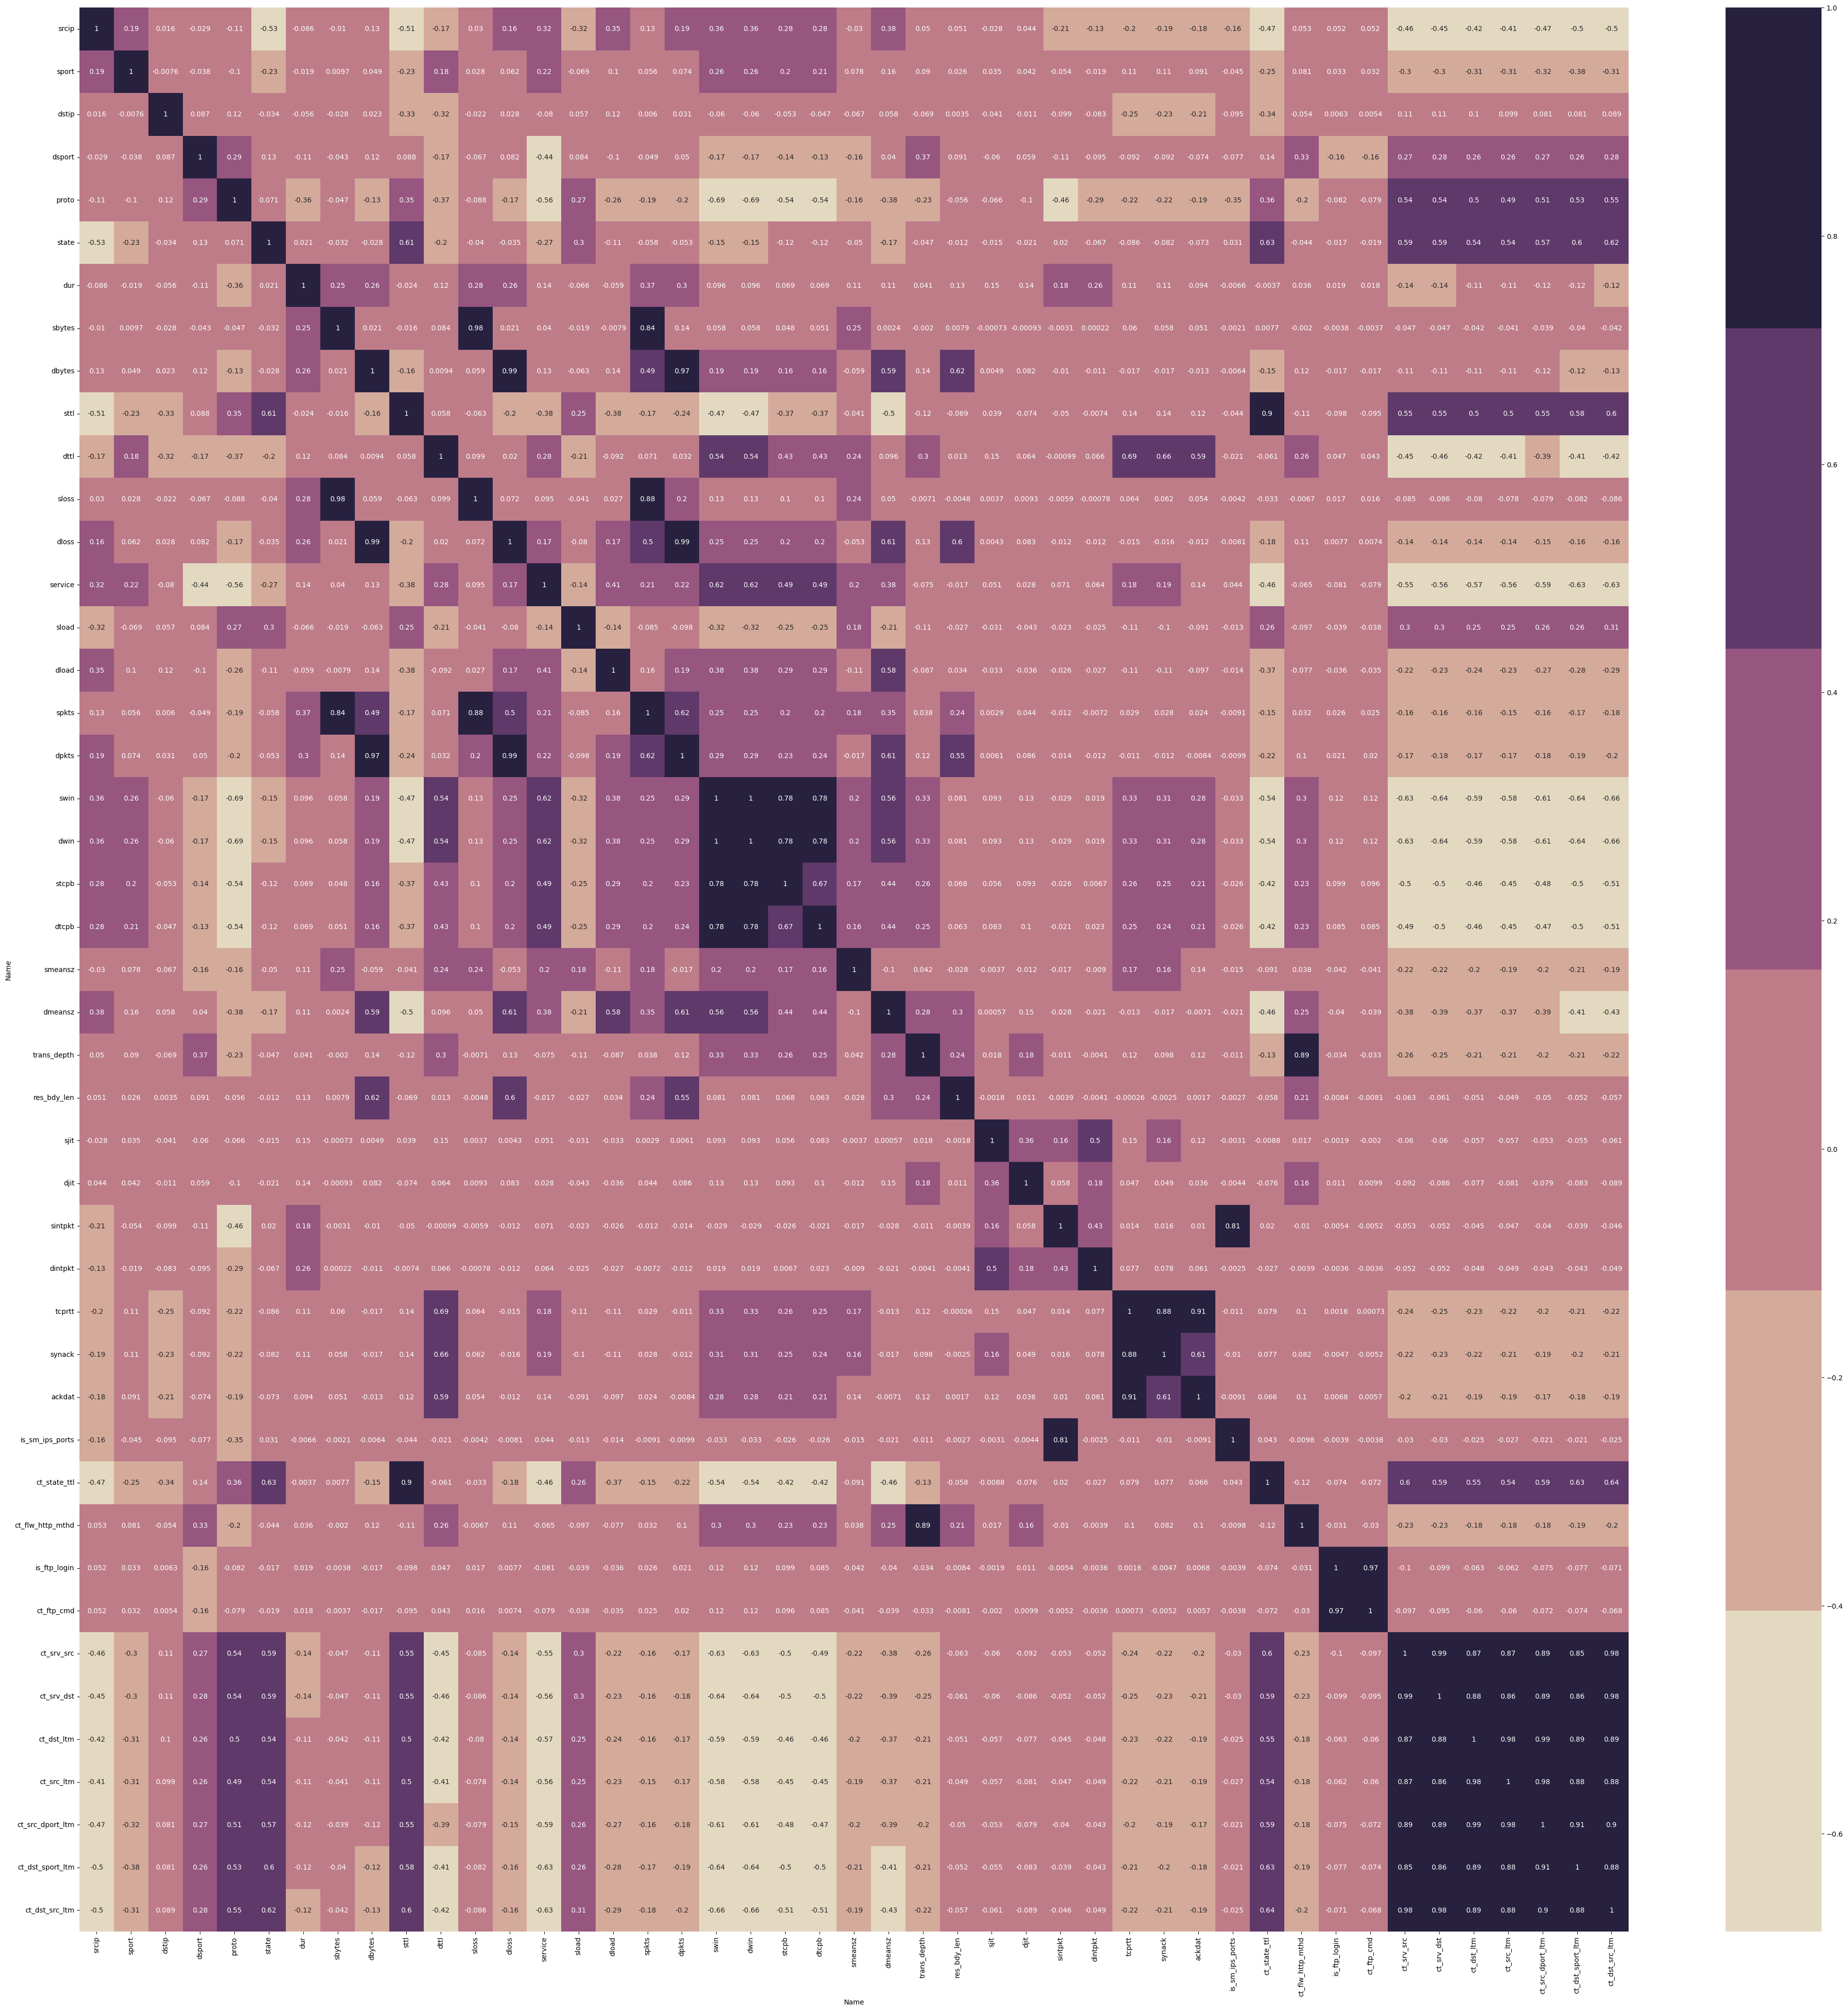

In [ ]:
train = x_train
#corr=train.corr()
#train.head(20)
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = train.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, cmap= sns.color_palette("ch:s=-.2, r=.6"),annot=True)
plt.show()


In [ ]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.96)]
# We don't want to use these features for plotting because these are having high corr
# And most likely have same kind of plots with already plotted feature
print(to_drop)

['sloss', 'dloss', 'dpkts', 'dwin', 'ct_ftp_cmd', 'ct_srv_dst', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_src_ltm']


In [ ]:
x_train_selected = x_train.drop(to_drop, axis=1)
x_test_selected = x_test.drop(to_drop, axis=1)
x_train_selected.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_dst_ltm,ct_dst_sport_ltm
0,32,33730,20,19439,7,2,0.001013,146.0,178.0,31.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,10.0,1.0,1.0
1,29,40007,18,9586,6,4,0.178323,4160.0,2664.0,31.0,...,0.000595,0.000471,0.000124,0.0,0.0,0.0,0.0,6.0,4.0,1.0
2,34,26508,19,25661,6,4,1.200885,1580.0,10168.0,31.0,...,0.000758,0.000588,0.000170,0.0,0.0,1.0,0.0,1.0,3.0,1.0
3,31,34883,20,25661,6,4,1.084026,1684.0,10168.0,31.0,...,0.000617,0.000491,0.000126,0.0,0.0,1.0,0.0,2.0,6.0,1.0
4,28,45519,6,19439,7,2,0.001043,146.0,178.0,31.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3.0,4.0,1.0


In [ ]:
x_normal = x_train_selected[train_normal]
x_normal.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_dst_ltm,ct_dst_sport_ltm
0,32,33730,20,19439,7,2,0.001013,146.0,178.0,31.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,10.0,1.0,1.0
1,29,40007,18,9586,6,4,0.178323,4160.0,2664.0,31.0,...,0.000595,0.000471,0.000124,0.0,0.0,0.0,0.0,6.0,4.0,1.0
2,34,26508,19,25661,6,4,1.200885,1580.0,10168.0,31.0,...,0.000758,0.000588,0.000170,0.0,0.0,1.0,0.0,1.0,3.0,1.0
3,31,34883,20,25661,6,4,1.084026,1684.0,10168.0,31.0,...,0.000617,0.000491,0.000126,0.0,0.0,1.0,0.0,2.0,6.0,1.0
4,28,45519,6,19439,7,2,0.001043,146.0,178.0,31.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3.0,4.0,1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


# Train the Isolation Forest model
IF = IsolationForest(random_state=88)
IF.fit(x_normal)

# Predict on training and test sets
y_if_train_sel = IF.predict(x_train_selected)
y_if_hold_sel = IF.predict(x_test_selected)

# Decision function values
decision_function_train_sel = IF.decision_function(x_train_selected)
decision_function_test_sel = IF.decision_function(x_test_selected)



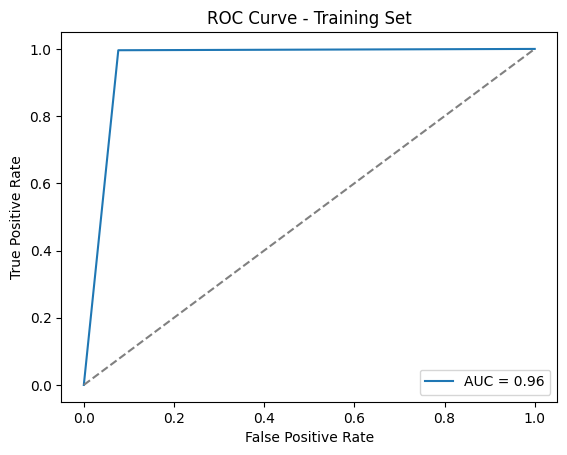

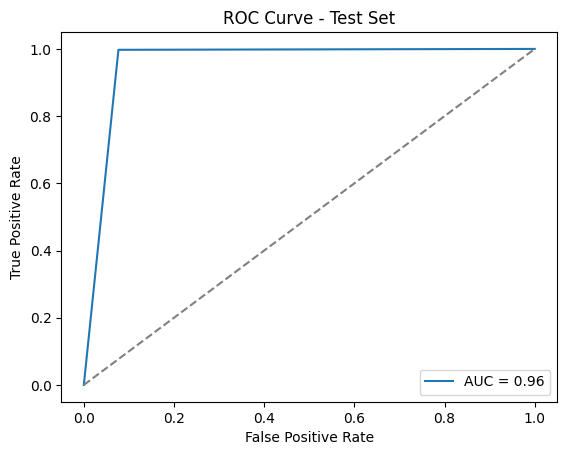

In [ ]:
# Plot ROC Curve and AUC Score
def plot_roc_curve(y_true, y_scores, title='ROC Curve', save_path=None):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc_score = roc_auc_score(y_true, y_scores)

    plt.figure()  # Create a new figure for ROC curve
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()

# Save ROC curve for training set
plot_roc_curve(y_train, np.where(y_if_train_sel == -1, 1, 0), title='ROC Curve - Training Set', save_path='roc_curve_train_afterSel.png')

# Save ROC curve for test set
plot_roc_curve(y_test, np.where(y_if_hold_sel == -1, 1, 0), title='ROC Curve - Test Set', save_path='roc_curve_test_afterSel.png')


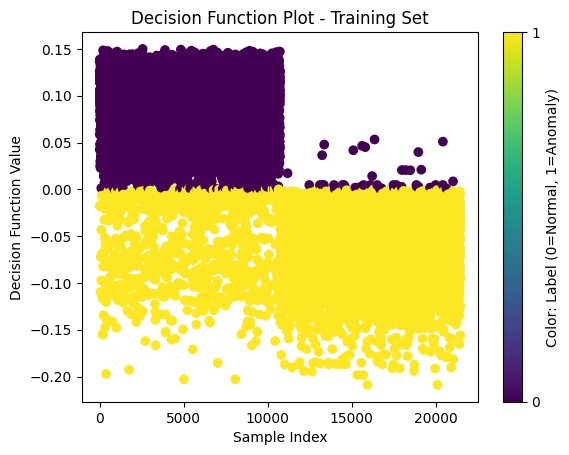

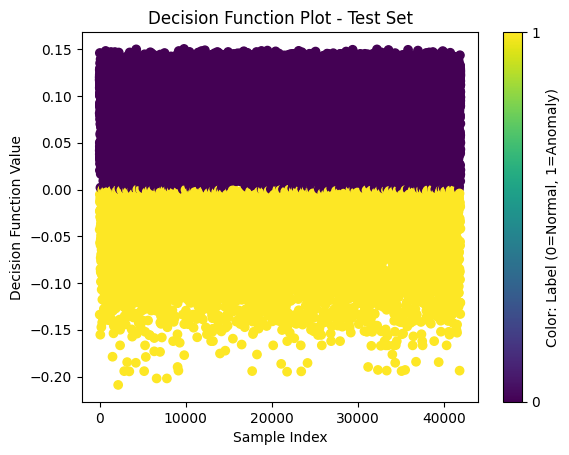

In [ ]:
# Plot Decision Function Plot
def plot_decision_function(model, X, title='Decision Function Plot', save_path=None):
    decision_function = model.decision_function(X)
    colors = np.where(decision_function < 0, 1, 0)  # Use binary colors for anomalies (1) and normal samples (0)

    plt.figure()  # Create a new figure
    plt.scatter(range(len(X)), decision_function, c=colors, cmap='viridis')
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Decision Function Value')
    plt.colorbar(ticks=[0, 1], label='Color: Label (0=Normal, 1=Anomaly)')

    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()

# Save decision function plot for training set
plot_decision_function(IF, x_train_selected, title='Decision Function Plot - Training Set', save_path='decision_function_train_select.png')

# Save decision function plot for test set
plot_decision_function(IF, x_test_selected, title='Decision Function Plot - Test Set', save_path='decision_function_test_select.png')


In [ ]:
# Print Classification Report
def print_classification_report(y_true, y_pred):
    print(classification_report(y_true, y_pred, zero_division=1))  # Set zero_division to 1

# Save classification report for training set
print_classification_report(y_train, np.where(y_if_train_sel == -1, 1, 0))

# Save classification report for test set
print_classification_report(y_test, np.where(y_if_hold_sel == -1, 1, 0))


              precision    recall  f1-score   support

           0       1.00      0.92      0.96     10737
           1       0.93      1.00      0.96     10737

    accuracy                           0.96     21474
   macro avg       0.96      0.96      0.96     21474
weighted avg       0.96      0.96      0.96     21474

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     37288
           1       0.62      1.00      0.76      4602

    accuracy                           0.93     41890
   macro avg       0.81      0.96      0.86     41890
weighted avg       0.96      0.93      0.94     41890



In [ ]:
# Train the Isolation Forest model
IF = IsolationForest(random_state=88)
IF.fit(x_normal)

IsolationForest(random_state=88)

In [ ]:
y_if_train_sel = IF.predict(x_train_selected)
y_if_hold_sel = IF.predict(x_test_selected)

In [ ]:
conf_matrix_train = confusion_matrix(y_train, np.where(y_if_train_sel == -1, 1, 0))
print("Confusion Matrix:")
print(conf_matrix_train)

Confusion Matrix:
[[238717  18309]
 [  9531 247495]]


In [ ]:
print(roc_auc_score(y_train, np.where(y_if_train_sel == -1, 1, 0)))

0.9598118655117818


In [ ]:
print(roc_auc_score(y_test, np.where(y_if_hold_sel == -1, 1, 0)))

0.9603192613008102


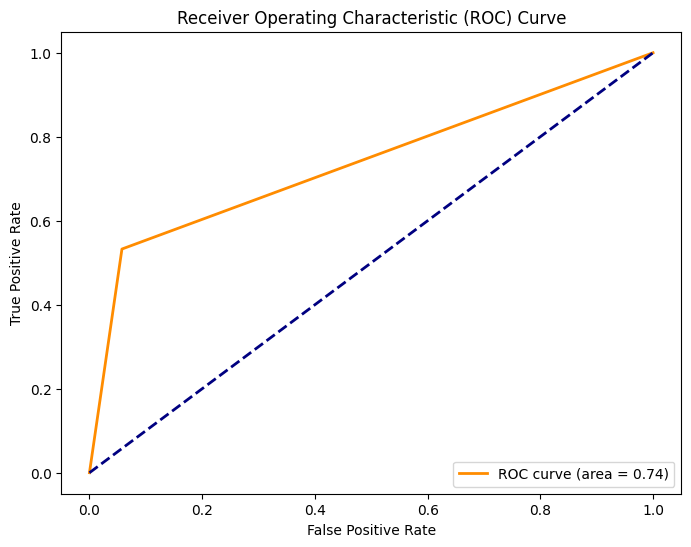

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import IsolationForest

# Assuming 'y_train' contains the true labels and 'y_if_train' contains Isolation Forest predictions
# ...

# Convert -1 to 1 for outliers and 1 to 0 for inliers in 'y_if_train'
y_if_hold_sel[y_if_hold_sel == 1] = 0
y_if_hold_sel[y_if_hold_sel== -1] = 1

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_if_hold_sel)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('Unsupervised_RC_After_selection_test.png', dpi=300, format='png')
plt.show()
